In [1]:
#Innovaccer internship submission
#Dataset-2
"""
Intern_Name: Nishant prajapati
College : National Institute of Technology, Rourkela
Year : 3rd
Department: Computer Science and Engineering
Github: https://github.com/nishantprajapati123
LinkedIn: https://www.linkedin.com/in/nishant-prajapati-11253b152/
HackerRank : https://www.hackerrank.com/Nishant_2017
FaceBook : https://www.facebook.com/nishant.kumar.7121614

"""
#importing required library
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
color = sns.color_palette()
%matplotlib inline

# Exploratory Data Analysis

In [2]:
#import excel file
df=pd.read_excel("dataset2.xlsx")

In [3]:
#basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
#statistical description of data
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
#start index from 1
df.index+=1

In [6]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
#column names
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [8]:
#unique value in each column
for i in df.columns:
    print("Unique value in ",i,df[i].unique())
    print("---------------------------------------------------------------------------------------------------------------")

Unique value in  Sample code number [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171

In [9]:
#how many times a particular value has repeated
for i in df.columns:
    print(df[i].value_counts())
    print("------------------------------------------------------------------------------")

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
1070935    2
385103     2
1293439    2
1240603    2
1277792    2
1168736    2
560680     2
1174057    2
822829     2
320675     2
897471     2
1114570    2
1339781    2
654546     2
704097     2
1017023    2
734111     2
1354840    2
769612     2
411453     2
1158247    2
1321942    2
1061990    2
733639     2
1218860    2
          ..
1096352    1
255644     1
1201870    1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
1184241    1
432809     1
1201834    1
1125035    1
888523     1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample code number, Length: 645, dtype: int64
------------------------------------------------------------------------------
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6     

As we have seen that there are 16 row in 'Bare nuclei' column which has NAN value. <br>   Therefore we can delete that 16 row

In [10]:
#drop all that rows
df=df.drop(df[df['Bare Nuclei']=='?'].index)

In [11]:
df.shape

(683, 11)

In [12]:
#reset the index
df = df.reset_index(drop=True)
#start index from 1
df.index+=1

In [13]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4
7,1018099,1,1,1,1,2,10,3,1,1,2
8,1018561,2,1,2,1,2,1,3,1,1,2
9,1033078,2,1,1,1,2,1,1,1,5,2
10,1033078,4,2,1,1,2,1,2,1,1,2


Now assign  
benign - 0  
malignant-1

In [15]:
def change(x):
    if(x==2):
        return 0
    else:
        return 1

# Seperate feature vector and target vector

In [16]:
#apply this "change" function to column=class
df_output=df['class'].apply(change)

In [20]:
df_features=df.iloc[:,:10]

Therefore our feature vector is df_features <br> and target vector is df_output

# Graph

Below graph shows dependencies of tumor against given features

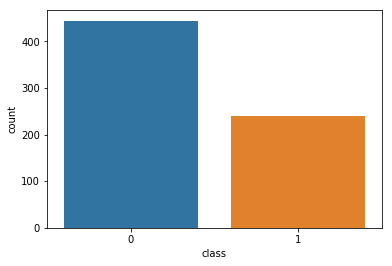

In [211]:
#number of Benign (0) and malignant tumor (1)
sns.countplot(df_output)

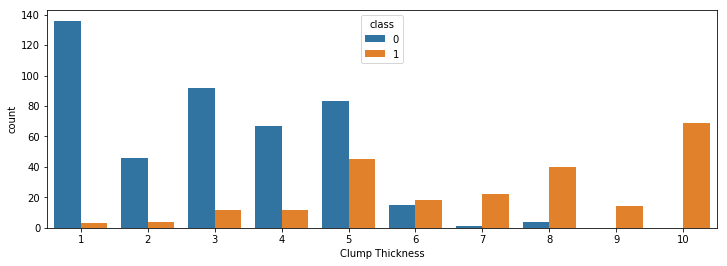

In [227]:
#variation against clump thichkness
plt.figure(figsize=(12,4))
sns.countplot(df_features['Clump Thickness'],hue=df_output)

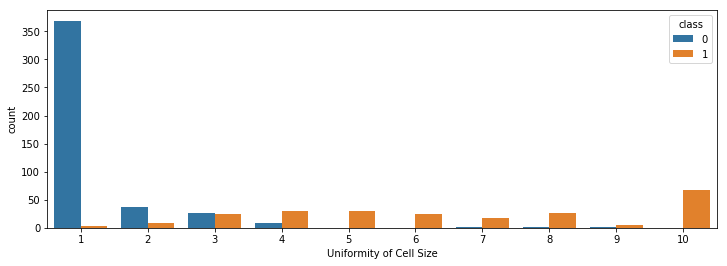

In [216]:
#variation against Uniformity of Cell Size
plt.figure(figsize=(12,4))
sns.countplot(df_features['Uniformity of Cell Size'],hue=df_output)

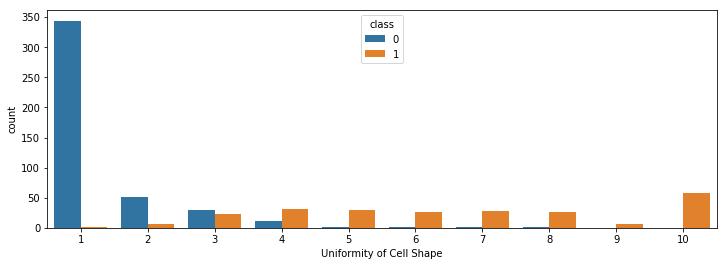

In [217]:
#variation against Uniformity of Cell Shape
plt.figure(figsize=(12,4))
sns.countplot(df_features['Uniformity of Cell Shape'],hue=df_output)

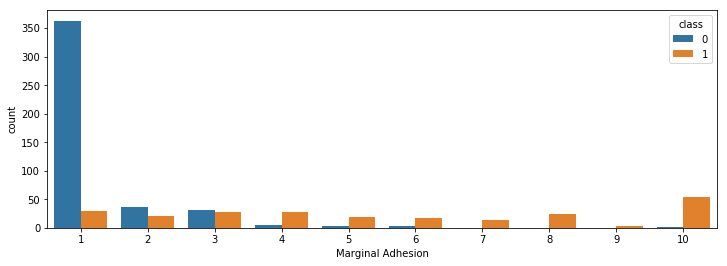

In [218]:
#variation against Marginal Adhesion
plt.figure(figsize=(12,4))
sns.countplot(df_features['Marginal Adhesion'],hue=df_output)

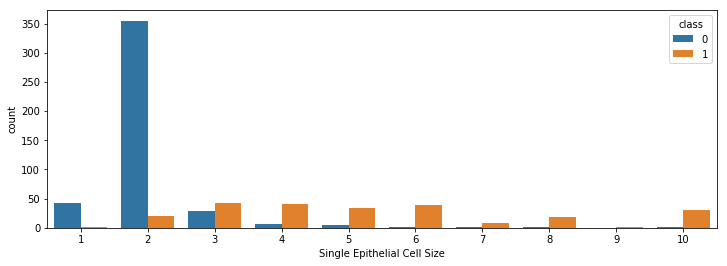

In [219]:
#variation against Single Epithelial Cell Size
plt.figure(figsize=(12,4))
sns.countplot(df_features['Single Epithelial Cell Size'],hue=df_output)

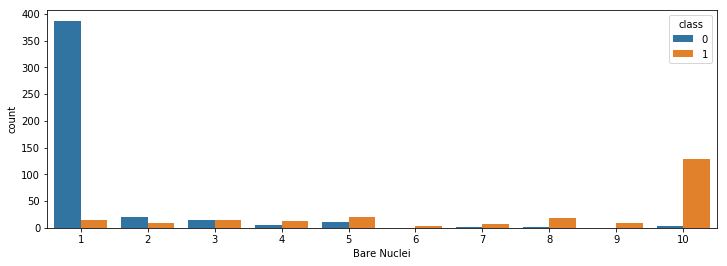

In [220]:
#variation against Bare Nuclei
plt.figure(figsize=(12,4))
sns.countplot(df_features['Bare Nuclei'],hue=df_output)

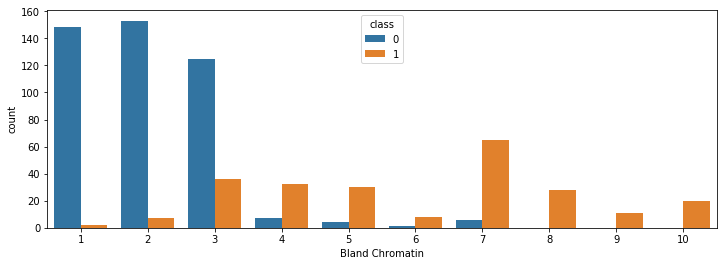

In [221]:
#variation against Bland Chromatin
plt.figure(figsize=(12,4))
sns.countplot(df_features['Bland Chromatin'],hue=df_output)

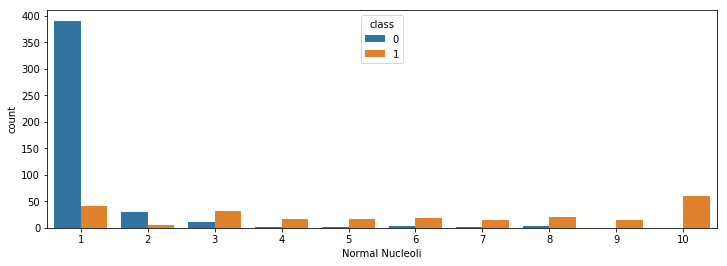

In [222]:
#variation against Normal Nucleoli
plt.figure(figsize=(12,4))
sns.countplot(df_features['Normal Nucleoli'],hue=df_output)

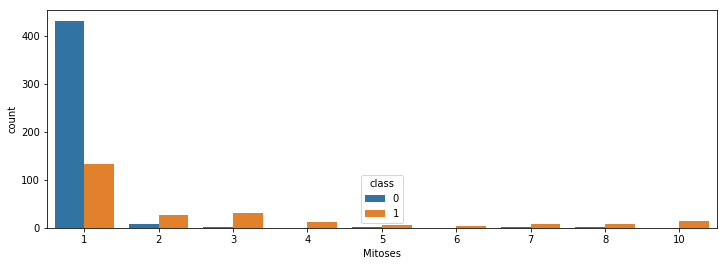

In [226]:
#variation against Mitoses
plt.figure(figsize=(12,4))
sns.countplot(df_features['Mitoses'],hue=df_output)

# Split it dataset for training and testing 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_features,df_output,test_size=0.2, random_state=21)

In [23]:
print("Training feature vector",X_train.shape)
print("Training target vector",y_train.shape)
print("Testing feature vector",X_test.shape)
print("Testing target vector",y_test.shape)

Training feature vector (546, 10)
Training target vector (546,)
Testing feature vector (137, 10)
Testing target vector (137,)


# Classification

Here we are considering bengin=0 i.e., negative class <br>and malignant=1 i.e., positive class

Different classifier has been used to classify and to show false positive and false negative rate<br>Finally to reduce False Negative rate (As mentioned in question) I used Voting Classifier which will take vote of 5 classifier and give its result according to vote. 

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [34]:
def evaluation(metric):
    TP=metric[1][1]
    TN=metric[0][0]
    FP=metric[0][1]
    FN=metric[1][0]
    print("True positive (Actually malignant and predicted as malignant)=",TP)
    print("True negative (Actually bengin and predicted as bengin)=",TN)
    print("False positive (Actually bengin and predicted as malignant)=",FP)
    print("False negative (Actually malignant and predicted as bengin)=",FN)
    print("Accuracy of model=",(TP+TN)/(TP+TN+FP+FN))
    print("Sensitivity of model=",TP/(TN+FN))
    print("Specificity of model=",TN/(TN+FP))
    print("False postive rate=",FP/(TN+FP))
    print("False negative rate=",FN/(TP+FN))

__1. Decision tree__

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
#predict
y_pred = dt.predict(X_test)

In [56]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)

In [57]:
conf_metrics

array([[84,  0],
       [ 8, 45]], dtype=int64)

In [58]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 45
True negative (Actually bengin and predicted as bengin)= 84
False positive (Actually bengin and predicted as malignant)= 0
False negative (Actually malignant and predicted as bengin)= 8
Accuracy of model= 0.9416058394160584
Sensitivity of model= 0.4891304347826087
Specificity of model= 1.0
False postive rate= 0.0
False negative rate= 0.1509433962264151


In [59]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95        84
          1       1.00      0.85      0.92        53

avg / total       0.95      0.94      0.94       137



__2. Random forest__

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)
#predict
y_pred = rf.predict(X_test)

In [61]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[83  1]
 [ 3 50]]


In [62]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 50
True negative (Actually bengin and predicted as bengin)= 83
False positive (Actually bengin and predicted as malignant)= 1
False negative (Actually malignant and predicted as bengin)= 3
Accuracy of model= 0.9708029197080292
Sensitivity of model= 0.5813953488372093
Specificity of model= 0.9880952380952381
False postive rate= 0.011904761904761904
False negative rate= 0.05660377358490566


In [63]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98        84
          1       0.98      0.94      0.96        53

avg / total       0.97      0.97      0.97       137



__3. KNN__

In [237]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
#predict
y_pred=knn.predict(X_test)

In [238]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[62 22]
 [36 17]]


In [66]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 9
True negative (Actually bengin and predicted as bengin)= 79
False positive (Actually bengin and predicted as malignant)= 5
False negative (Actually malignant and predicted as bengin)= 44
Accuracy of model= 0.6423357664233577
Sensitivity of model= 0.07317073170731707
Specificity of model= 0.9404761904761905
False postive rate= 0.05952380952380952
False negative rate= 0.8301886792452831


In [67]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      0.94      0.76        84
          1       0.64      0.17      0.27        53

avg / total       0.64      0.64      0.57       137



__4. Naive bayes__

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
#predict
y_pred = gnb.predict(X_test)

In [69]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[77  7]
 [17 36]]


In [70]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 36
True negative (Actually bengin and predicted as bengin)= 77
False positive (Actually bengin and predicted as malignant)= 7
False negative (Actually malignant and predicted as bengin)= 17
Accuracy of model= 0.8248175182481752
Sensitivity of model= 0.3829787234042553
Specificity of model= 0.9166666666666666
False postive rate= 0.08333333333333333
False negative rate= 0.32075471698113206


In [71]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87        84
          1       0.84      0.68      0.75        53

avg / total       0.83      0.82      0.82       137



__5. Logistic Regression__

In [74]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=42, solver='newton-cg')
lg.fit(X_train,y_train)
#predict
y_pred=lg.predict(X_test)

In [75]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[84  0]
 [ 4 49]]


In [76]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 49
True negative (Actually bengin and predicted as bengin)= 84
False positive (Actually bengin and predicted as malignant)= 0
False negative (Actually malignant and predicted as bengin)= 4
Accuracy of model= 0.9708029197080292
Sensitivity of model= 0.5568181818181818
Specificity of model= 1.0
False postive rate= 0.0
False negative rate= 0.07547169811320754


In [77]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98        84
          1       1.00      0.92      0.96        53

avg / total       0.97      0.97      0.97       137



__6. QDA__

In [122]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)

In [123]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[82  2]
 [ 2 51]]


In [124]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 51
True negative (Actually bengin and predicted as bengin)= 82
False positive (Actually bengin and predicted as malignant)= 2
False negative (Actually malignant and predicted as bengin)= 2
Accuracy of model= 0.9708029197080292
Sensitivity of model= 0.6071428571428571
Specificity of model= 0.9761904761904762
False postive rate= 0.023809523809523808
False negative rate= 0.03773584905660377


In [125]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        84
          1       0.96      0.96      0.96        53

avg / total       0.97      0.97      0.97       137



__7. AdaBoost__

In [126]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)

In [127]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[83  1]
 [ 2 51]]


In [128]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 51
True negative (Actually bengin and predicted as bengin)= 83
False positive (Actually bengin and predicted as malignant)= 1
False negative (Actually malignant and predicted as bengin)= 2
Accuracy of model= 0.9781021897810219
Sensitivity of model= 0.6
Specificity of model= 0.9880952380952381
False postive rate= 0.011904761904761904
False negative rate= 0.03773584905660377


In [129]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98        84
          1       0.98      0.96      0.97        53

avg / total       0.98      0.98      0.98       137



__8. Voting classifier__

In [187]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('dt',dt),('rf',rf),('lg',lg),('qda',qda),('adb',adb)],voting='soft',weights=[2,2,1,2,2],flatten_transform=True)
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)

C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [188]:
conf_metrics=metrics.confusion_matrix(y_test,y_pred)
print(conf_metrics)

[[83  1]
 [ 2 51]]


In [189]:
evaluation(conf_metrics)

True positive (Actually malignant and predicted as malignant)= 51
True negative (Actually bengin and predicted as bengin)= 83
False positive (Actually bengin and predicted as malignant)= 1
False negative (Actually malignant and predicted as bengin)= 2
Accuracy of model= 0.9781021897810219
Sensitivity of model= 0.6
Specificity of model= 0.9880952380952381
False postive rate= 0.011904761904761904
False negative rate= 0.03773584905660377


In [190]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98        84
          1       0.98      0.96      0.97        53

avg / total       0.98      0.98      0.98       137

